In [ ]:
! pip install Sastrawi
import string
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import io
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_citramerk.xlsx to data_citramerk.xlsx


In [ ]:
df = pd.read_excel("data_design.xlsx")
df

,Ulasan,Sentimen
0,Lebih bagus lagi kalo tompel nya beneran ilang...,Positif
1,"Sebagai user Android, saya akui fitur dynamic ...",Positif
2,Iphone emang nggak pernah gagal kalo ngeluarin...,Negatif
3,"Hp mahal Bagus sih wajar, tpi saya suka ukuran...",Positif
4,"wah yang dynamic island inovasinya keren sih, ...",Positif
...,...,...
245,Wih keren Dynamic island nya,Positif
246,Dynamic island ny memng keren performa a16 man...,Positif
247,Mending tompel tapi bukan sembarang tompel sih...,Positif
248,Dylan inovasi jenius sih hahahaha,Positif


In [ ]:
# Case Folding
def pre_process(text):
 text = text.lower()
 return text
df['Ulasan'] = df['Ulasan'].apply(lambda x:pre_process(x))
df

,Ulasan,Sentimen
0,lebih bagus lagi kalo tompel nya beneran ilang...,Positif
1,"sebagai user android, saya akui fitur dynamic ...",Positif
2,iphone emang nggak pernah gagal kalo ngeluarin...,Negatif
3,"hp mahal bagus sih wajar, tpi saya suka ukuran...",Positif
4,"wah yang dynamic island inovasinya keren sih, ...",Positif
...,...,...
245,wih keren dynamic island nya,Positif
246,dynamic island ny memng keren performa a16 man...,Positif
247,mending tompel tapi bukan sembarang tompel sih...,Positif
248,dylan inovasi jenius sih hahahaha,Positif


In [ ]:
# Cleaning : pembersihan kalimat dari atribut-atribut yang mengganggu, seperti angka, tanda baca, dan karakter kosong
def pre_process(text):
 # Menghapus karakter angka.
 text = re.sub(r"\d+", "", text)
 # Menghapus karakter tanda baca.
 text = text.translate(str.maketrans("","",string.punctuation))
 # Menghapus karakter kosong.
 text = text.strip()
 return text
df['Ulasan'] = df['Ulasan'].apply(lambda x:pre_process(x))
df

,Ulasan,Sentimen
0,lebih bagus lagi kalo tompel nya beneran ilang...,Positif
1,sebagai user android saya akui fitur dynamic i...,Positif
2,iphone emang nggak pernah gagal kalo ngeluarin...,Negatif
3,hp mahal bagus sih wajar tpi saya suka ukuran ...,Positif
4,wah yang dynamic island inovasinya keren sih k...,Positif
...,...,...
245,wih keren dynamic island nya,Positif
246,dynamic island ny memng keren performa a mantap,Positif
247,mending tompel tapi bukan sembarang tompel sih...,Positif
248,dylan inovasi jenius sih hahahaha,Positif


In [ ]:
# Tokenizing : Memotong kalimat agar terpisah-pisah menjadi satuan kata
def pre_process(text):
 text = nltk.tokenize.word_tokenize(text)
 return text
df['Ulasan'] = df['Ulasan'].apply(lambda x:pre_process(x))
df

,Ulasan,Sentimen
0,"[lebih, bagus, lagi, kalo, tompel, nya, benera...",Positif
1,"[sebagai, user, android, saya, akui, fitur, dy...",Positif
2,"[iphone, emang, nggak, pernah, gagal, kalo, ng...",Negatif
3,"[hp, mahal, bagus, sih, wajar, tpi, saya, suka...",Positif
4,"[wah, yang, dynamic, island, inovasinya, keren...",Positif
...,...,...
245,"[wih, keren, dynamic, island, nya]",Positif
246,"[dynamic, island, ny, memng, keren, performa, ...",Positif
247,"[mending, tompel, tapi, bukan, sembarang, tomp...",Positif
248,"[dylan, inovasi, jenius, sih, hahahaha]",Positif


In [ ]:
# Stopword Removal : menghapus kata-kata yang tidak relevan / tidak penting
def pre_process(text):
 factory = StopWordRemoverFactory()
 stopword = factory.create_stop_word_remover()
 text = [stopword.remove(word) for word in text]
 return text
df['Ulasan'] = df['Ulasan'].apply(lambda x:pre_process(x))
df

,Ulasan,Sentimen
0,"[lebih, bagus, , kalo, tompel, nya, beneran, i...",Positif
1,"[, user, android, , akui, fitur, dynamic, isla...",Positif
2,"[iphone, emang, , pernah, gagal, kalo, ngeluar...",Negatif
3,"[hp, mahal, bagus, sih, wajar, tpi, , suka, uk...",Positif
4,"[wah, , dynamic, island, inovasinya, keren, si...",Positif
...,...,...
245,"[wih, keren, dynamic, island, nya]",Positif
246,"[dynamic, island, ny, memng, keren, performa, ...",Positif
247,"[mending, tompel, , bukan, sembarang, tompel, ...",Positif
248,"[dylan, inovasi, jenius, sih, hahahaha]",Positif


In [ ]:
# Stemming : menghilangkan imbuhan
def pre_process(text):
 factory = StemmerFactory()
 stemmer = factory.create_stemmer()
 text = [stemmer.stem(word) for word in text]
 return text
df['Ulasan'] = df['Ulasan'].apply(lambda x:pre_process(x))
df

,Ulasan,Sentimen
0,"[lebih, bagus, , kalo, tompel, nya, beneran, i...",Positif
1,"[, user, android, , aku, fitur, dynamic, islan...",Positif
2,"[iphone, emang, , pernah, gagal, kalo, ngeluar...",Negatif
3,"[hp, mahal, bagus, sih, wajar, tpi, , suka, uk...",Positif
4,"[wah, , dynamic, island, inovasi, keren, sih, ...",Positif
...,...,...
245,"[wih, keren, dynamic, island, nya]",Positif
246,"[dynamic, island, ny, memng, keren, performa, ...",Positif
247,"[mending, tompel, , bukan, sembarang, tompel, ...",Positif
248,"[dylan, inovasi, jenius, sih, hahahaha]",Positif


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
labels = df['Sentimen'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
encoded_labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
data_clean = df
data_clean = data_clean.astype({'Sentimen' : 'category'})
data_clean = data_clean.astype({'Ulasan' : 'string'})
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Ulasan'].astype('U'))
tokens_tf=tf.get_feature_names_out()
df = pd.DataFrame(data = text_tf.toarray(),columns = tokens_tf)
df

,abis,abiss,ad,adlh,ahhh,aipon,aja,ajaa,ajaenak,ajah,...,wkwkwkwkwkwwbrgede,worth,wow,woww,xiaomi,yaaa,yah,yakim,yakin,yg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100405,0.0,0.0,0.0,0.100405,0.266102
2,0.0,0.0,0.0,0.0,0.0,0.0,0.119028,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
246,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
247,0.0,0.0,0.0,0.0,0.0,0.0,0.133815,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.129550
248,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
df.to_excel(r'TFIDF_Design.xlsx', sheet_name='TFIDF', index=False)

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X = text_tf.toarray()
y = encoded_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

max_depth_range = (1, 10)

# Define the objective function
def objective_function(max_depth):
    model = xgb.XGBClassifier(max_depth=int(max_depth), random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

In [ ]:
# PSO Parameters
#num_particles = 20
num_particles = 50
#max_iterations = 50
max_iterations = 100
#inertia_weight = 0.7
inertia_weight = 1
cognitive_weight = 1.4
social_weight = 1.4

# Initialize particles randomly within the parameter range
particles = np.random.uniform(low=max_depth_range[0], high=max_depth_range[1], size=(num_particles,))

# Initialize velocities randomly
velocities = np.random.uniform(low=-1, high=1, size=(num_particles,))

# Initialize personal best positions and scores
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(num_particles)
for i, particle in enumerate(particles):
    personal_best_scores[i] = objective_function(particle)

# Initialize global best position and score
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

In [ ]:
# PSO Optimization
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        velocities[i] = (inertia_weight * velocities[i]) + \
                        (cognitive_weight * np.random.rand() * (personal_best_positions[i] - particles[i])) + \
                        (social_weight * np.random.rand() * (global_best_position - particles[i]))

        # Update position
        particles[i] = particles[i] + velocities[i]

        # Ensure position stays within bounds
        particles[i] = np.clip(particles[i], max_depth_range[0], max_depth_range[1])

        # Evaluate new position
        score = objective_function(particles[i])

        # Update personal best
        if score < personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i]

            # Update global best
            if score < global_best_score:
                global_best_score = score
                global_best_position = particles[i]

# Result
best_max_depth = global_best_position
print("Best max_depth:", best_max_depth)

In [ ]:
#XGBoost

params = {

    'booster': 'gbtree',
    ##'max_depth':int(best_max_depth),
    ##'max_depth':4,
}


model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred, "Length: ", len(pred))

[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 0 1 0] Length:  50


Accuracy: 92.00%


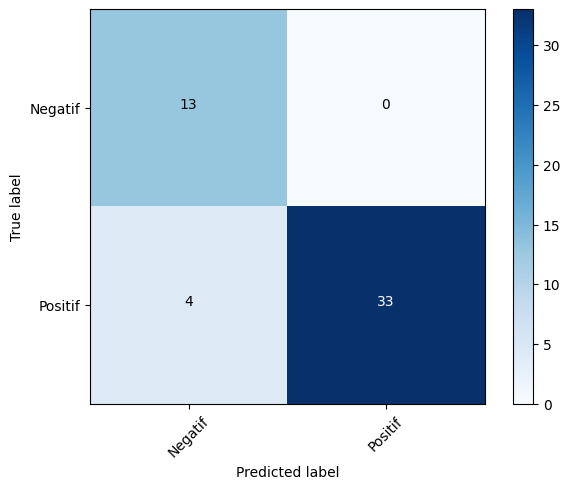

In [ ]:
print(f"Accuracy: {(sklearn.metrics.accuracy_score(y_test, pred)*100):.2f}%")

cm = confusion_matrix(y_test, pred)

# Proses penghitungan Confusion Matrix
def plot_cm(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title = title
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm, classes=['Negatif', 'Positif'],
 title='Confusion matrix')


In [ ]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, pred)
print('Classification Report : \n', classification_report)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.97      1.00      0.98        56

    accuracy                           0.97        75
   macro avg       0.98      0.95      0.96        75
weighted avg       0.97      0.97      0.97        75

